<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/Dacon_%EC%8B%A0%EC%9A%A9_%EC%98%88%EC%B8%A1_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [1]:
pip install plotly.express

In [2]:
pip install pywaffle

     |████████████████████████████████| 532kB 8.6MB/s 


In [3]:
pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 252kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


# **신용카드 사용자 연체 예측 AI 경진대회(Dacon)**

*   2021-04-10부터 시작(본인이)
*   신용카드 사용자 데이터를 보고 사용자의 대금 연체 정도를 예측하는 알고리즘 개발 
*   신용카드 사용자들의 개인 신상정보 데이터로 사용자의 신용카드 대금 연체 정도를 예측
*   이번 대회는 특이하게 심사기준이 Logloss(손실함수)이다.

index


gender: 성별


car: 차량 소유 여부


reality: 부동산 소유 여부


child_num: 자녀 수


income_total: 연간 소득


income_type: 소득 분류


							['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']



edu_type: 교육 수준


							['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']



family_type: 결혼 여부


							['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']



house_type: 생활 방식


							['Municipal apartment', 'House / apartment', 'With parents',

							

							 'Co-op apartment', 'Rented apartment', 'Office apartment']



DAYS_BIRTH: 출생일


							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미



DAYS_EMPLOYED: 업무 시작일


							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미

													

							양수 값은 고용되지 않은 상태를 의미함



FLAG_MOBIL: 핸드폰 소유 여부


work_phone: 업무용 전화 소유 여부


phone: 전화 소유 여부


email: 이메일 소유 여부


occyp_type: 직업 유형													


family_size: 가족 규모


begin_month: 신용카드 발급 월
			

							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미







credit: 사용자의 신용카드 대금 연체를 기준의 신용도


							=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함


In [139]:
train = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/신용카드 사용자 연체 예측 AI 경진대회/train.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/신용카드 사용자 연체 예측 AI 경진대회/test.csv')

In [140]:
train = train.drop(['index'], axis=1)
test = test.drop(['index'], axis=1)

In [3]:
print(f'train shape:{train.shape}, test shape:{test.shape}')

train shape:(26457, 20), test shape:(10000, 19)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

In [5]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


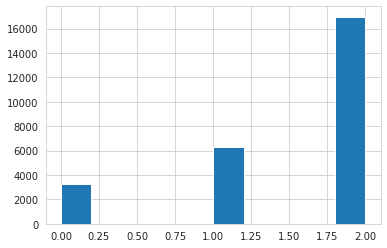

In [50]:
train.credit.hist()

In [52]:
train.credit.value_counts()

2    16968
1     6267
0     3222
Name: credit, dtype: int64

In [142]:
from sklearn.utils import resample
train.credit = train.credit.astype(int)

In [141]:
a_credit = train[train.credit == 0]
b_credit = train[train.credit == 1]
c_credit = train[train.credit == 2]
a_oversampled = resample(a_credit, replace=True, n_samples=len(c_credit), random_state=123)
b_oversampled = resample(b_credit, replace=True, n_samples=len(c_credit), random_state=123)
train = pd.concat([c_credit, a_oversampled, b_oversampled], axis=0)

In [143]:
data = pd.concat([train,test], axis=0)

In [57]:
train.credit.value_counts()

2    16968
1    16968
0    16968
Name: credit, dtype: int64

In [56]:
train.isnull().sum()

index                0
gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       15570
family_size          0
begin_month          0
credit               0
dtype: int64

**occyp_type columns이 결측치가 있는데...**
> occyp_type 이 컬럼은 직업별 시각화를 통해서, income_total을 통해 결측치 처리

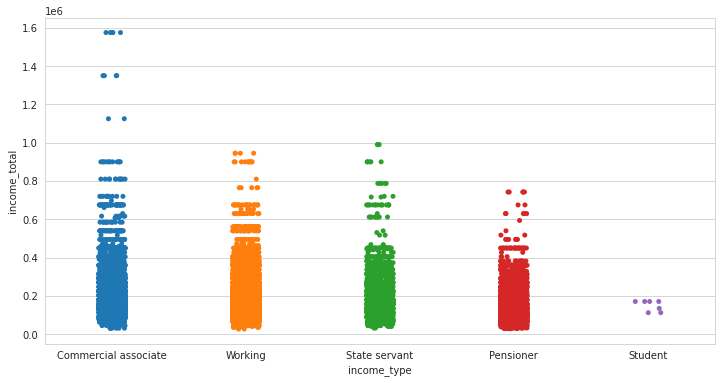

In [27]:
plt.figure(figsize=(12,6))
sns.stripplot(x='income_type', y=train['income_total'], data=train)

In [33]:
train.groupby('income_type')['income_total'].median()

income_type
Commercial associate    189000.0
Pensioner               135000.0
State servant           180000.0
Student                 171000.0
Working                 157500.0
Name: income_total, dtype: float64

In [34]:
train.groupby('occyp_type')['income_total'].median()

occyp_type
Accountants              180000.0
Cleaning staff           135000.0
Cooking staff            135000.0
Core staff               171000.0
Drivers                  202500.0
HR staff                 157500.0
High skill tech staff    180000.0
IT staff                 171000.0
Laborers                 162000.0
Low-skill Laborers       112500.0
Managers                 247500.0
Medicine staff           155250.0
Private service staff    180000.0
Realty agents            270000.0
Sales staff              157500.0
Secretaries              135000.0
Security staff           157500.0
Waiters/barmen staff     157500.0
Name: income_total, dtype: float64

# mode로 채워보자(결측치)

In [83]:
train['occyp_type'].fillna(train['occyp_type'].mode()[0], inplace=True)
test['occyp_type'].fillna(train['occyp_type'].mode()[0], inplace=True)
train.isnull().sum()

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64

In [145]:
data['occyp_type'].fillna(data['occyp_type'].mode()[0], inplace=True)

In [84]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for i in train.select_dtypes(include=['object']).columns:
  lencoders[i] = LabelEncoder()
  train[i] = lencoders[i].fit_transform(train[i])

for i in test.select_dtypes(include=['object']).columns:
  lencoders[i] = LabelEncoder()
  test[i] = lencoders[i].fit_transform(test[i])

In [146]:
lencoders = {}
for i in data.select_dtypes(include=['object']).columns:
  lencoders[i] = LabelEncoder()
  data[i] = lencoders[i].fit_transform(data[i])

In [74]:
target = train['credit']

In [75]:
train = train.drop(['credit'], axis=1)

In [147]:
Q3 = data.quantile(0.75)
Q1 = data.quantile(0.25)
IQR = Q3-Q1
print(IQR)

gender                1.0
car                   1.0
reality               1.0
child_num             1.0
income_total     103500.0
income_type           3.0
edu_type              3.0
family_type           0.0
house_type            0.0
DAYS_BIRTH         7011.0
DAYS_EMPLOYED      2687.0
FLAG_MOBIL            0.0
work_phone            0.0
phone                 1.0
email                 0.0
occyp_type            2.0
family_size           1.0
begin_month          28.0
credit                2.0
dtype: float64


In [121]:
data = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)]

In [122]:
data.shape

(13216, 19)

In [148]:
train = data[data['credit'].notnull()]
test = data[data['credit'].isnull()]

In [149]:
test = test.drop(['credit'], axis=1)

In [150]:
x = train.drop(['credit'], axis=1)
y = train['credit']

In [131]:
from sklearn.preprocessing import robust_scale

In [151]:
scaler = robust_scale(x)
x = pd.DataFrame(scaler, columns=x.columns)

In [89]:
from sklearn.model_selection import train_test_split

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25, random_state=25)

In [155]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, roc_auc_score, plot_confusion_matrix, log_loss

In [153]:
model_rf = RandomForestClassifier(max_depth=100, n_jobs=-1)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_rf))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

accuracy: 0.898004086122898
cohen_kappa_score: 0.8470709850091247
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.94      4246
         1.0       0.87      0.92      0.89      4179
         2.0       0.93      0.79      0.85      4301

    accuracy                           0.90     12726
   macro avg       0.90      0.90      0.90     12726
weighted avg       0.90      0.90      0.90     12726



In [154]:
model_xgb = xgb.XGBClassifier(max_depth=100, n_jobs=-1)
model_xgb.fit(x_train, y_train)
y_pred_xgb = model_xgb.predict(x_test)
print('accuracy:', accuracy_score(y_test, y_pred_xgb))
print('cohen_kappa_score:', cohen_kappa_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

accuracy: 0.9022473675939022
cohen_kappa_score: 0.8534151243141588
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      4246
         1.0       0.88      0.91      0.89      4179
         2.0       0.92      0.81      0.86      4301

    accuracy                           0.90     12726
   macro avg       0.90      0.90      0.90     12726
weighted avg       0.90      0.90      0.90     12726



In [157]:
model_rf_proba = model_rf.predict_proba(x_test)
log_loss(y_test, model_rf_proba)

0.49620892327949084

In [158]:
model_xgb_proba = model_xgb.predict_proba(x_test)
log_loss(y_test, model_xgb_proba)

0.3051410186512543

In [165]:
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [168]:
params = {'max_depth': 3,
         'eta': 0.1,
         'eval_metric': 'logloss',
         'early_stoppings': 100}
num_rounds = 400

In [169]:
wlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

[0]	train-logloss:0.590892	eval-logloss:0.589599
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.506135	eval-logloss:0.503937
[2]	train-logloss:0.434562	eval-logloss:0.431204
[3]	train-logloss:0.373248	eval-logloss:0.368848
[4]	train-logloss:0.320023	eval-logloss:0.31477
[5]	train-logloss:0.27233	eval-logloss:0.26602
[6]	train-logloss:0.229949	eval-logloss:0.223041
[7]	train-logloss:0.192397	eval-logloss:0.184563
[8]	train-logloss:0.157974	eval-logloss:0.14904
[9]	train-logloss:0.126233	eval-logloss:0.116735
[10]	train-logloss:0.096167	eval-logloss:0.086437
[11]	train-logloss:0.065541	eval-logloss:0.056571
[12]	train-logloss:0.028336	eval-logloss:0.024139
[13]	train-logloss:-0.03404	eval-logloss:-0.040059
[14]	train-logloss:-0.157189	eval-logloss:-0.121035
[15]	train-logloss:-0.233133	eval-logloss:-0.202581
[16]	train-logloss:-0.771784	eval-logloss:-0.806559
[17]	tr